# Risultati

#### **Setup di Pandas e Pyplot**: In questa cella, vengono importate le librerie necessarie.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### **Lettura dei due Dataset**

In [76]:
df = pd.read_csv('../results/Results_Cecchettin.csv')
df2 = pd.read_csv('../results/Results_Tramontano.csv')

In [79]:
df

,Comment,Date,Emotion
0,vero problema l'immensa orda giornalisti altra...,2023-11-20,anger
1,me l’unica cosa preoccupano persone ripubblica...,2023-11-19,fear
2,"idiota l'ex ragazzo, assassino, punto.",2023-11-19,anger
3,sti ragazzetti social ormai han perso testa og...,2023-11-20,anger
4,"fatevi influenzare post, continuate essere uom...",2023-11-19,anger
...,...,...,...
1012,"me frega cazzo oggi, me fregava cazzo ieri e, ...",2023-11-20,anger
1013,sempre hobby forte presenza maschile quindi on...,2023-11-20,anger
1014,piscio piedi. conta?,2023-11-20,anger
1015,penso cosa succedeva classe 5/6 anni fa denunc...,2023-11-20,joy


In [80]:
df2

,Comment,Date,Emotion
0,ragazzi commenti paura. esiste davvero gente p...,2023-08-30,fear
1,così tanti commenti gente allibita commenti tr...,2023-08-30,joy
2,allibita commenti… c’entra niente questione ge...,2023-08-30,anger
3,giustizia italiana ce mette proprio tutta risu...,2023-08-30,anger
4,piccolo appunto: renderei obbligatorio gip ess...,2023-08-30,anger
5,scorrere commenti fa venire brividi. seriament...,2023-08-30,sadness
6,persone commenti capito un'assurdità pensare u...,2023-08-30,anger
7,"modesto avviso solo c'è premeditazione, dovreb...",2023-08-30,anger
8,leggere commenti,2023-08-30,joy
9,pezzo corriere migliori sembra ben fatto. test...,2023-08-30,anger


#### **Plot dei dati mediante grafici a dispersione**

In [81]:
counts = df.groupby(['Date', 'Emotion']).size().unstack(fill_value=0)

In [82]:
counts2 = df2.groupby(['Date', 'Emotion']).size().unstack(fill_value=0)

In [83]:
counts2 = counts2.drop("2023-06-01")

In [84]:
counts

Emotion,anger,fear,joy,sadness
Date,,,,
2023-11-13,2,2,1,2
2023-11-14,4,3,0,5
2023-11-18,0,1,0,2
2023-11-19,67,10,7,15
2023-11-20,134,31,21,22
2023-11-21,135,19,14,21
2023-11-22,112,17,51,33
2023-11-23,35,5,11,5
2023-11-24,58,7,1,6


In [85]:
unique_dates = counts.index.unique()

In [86]:
unique_dates2 = counts2.index.unique()

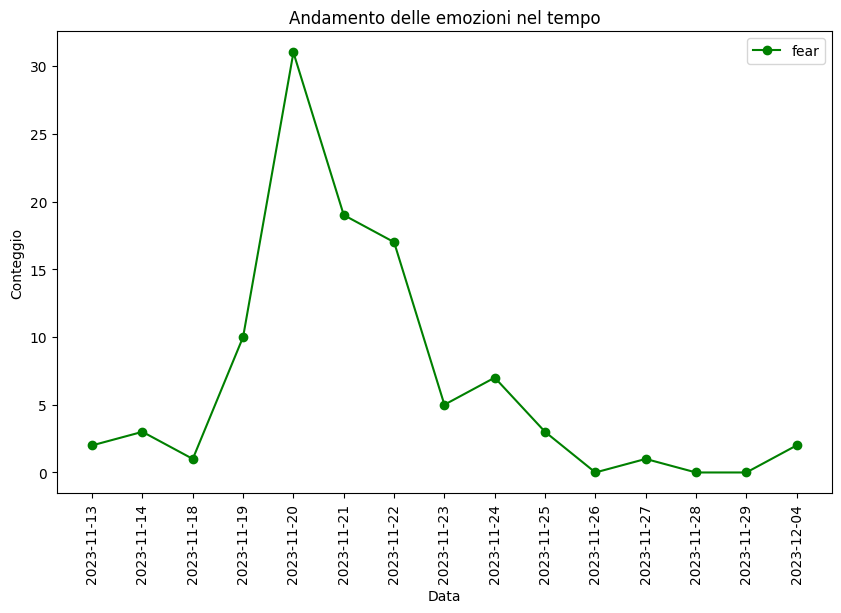

In [87]:
plt.figure(figsize=(10, 6))

plt.plot(unique_dates, counts['fear'], 'o-', label='fear', color='green')

plt.xlabel('Data')
plt.ylabel('Conteggio')
plt.title('Andamento delle emozioni nel tempo')
plt.xticks(rotation=90)
plt.legend()
plt.show()

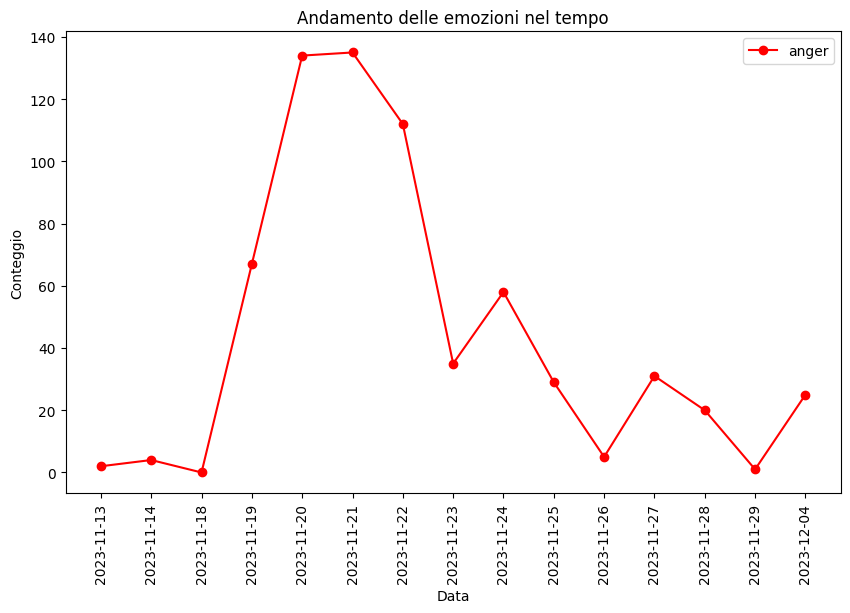

In [88]:
plt.figure(figsize=(10, 6))

plt.plot(unique_dates, counts['anger'], 'o-', label='anger', color='red')

plt.xlabel('Data')
plt.ylabel('Conteggio')
plt.title('Andamento delle emozioni nel tempo')
plt.xticks(rotation=90)
plt.legend()
plt.show()

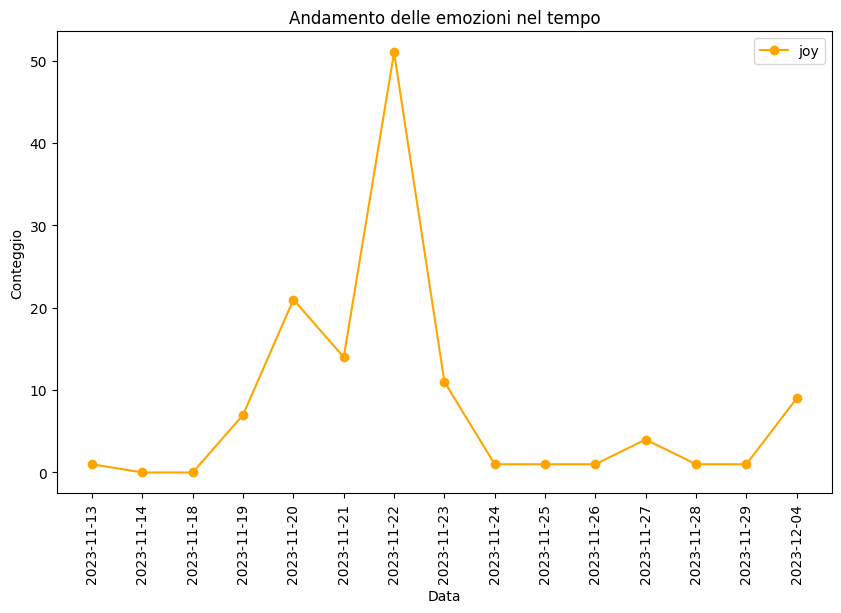

In [89]:
plt.figure(figsize=(10, 6))

plt.plot(unique_dates, counts['joy'], 'o-', label='joy', color='orange')

plt.xlabel('Data')
plt.ylabel('Conteggio')
plt.title('Andamento delle emozioni nel tempo')
plt.xticks(rotation=90)
plt.legend()
plt.show()

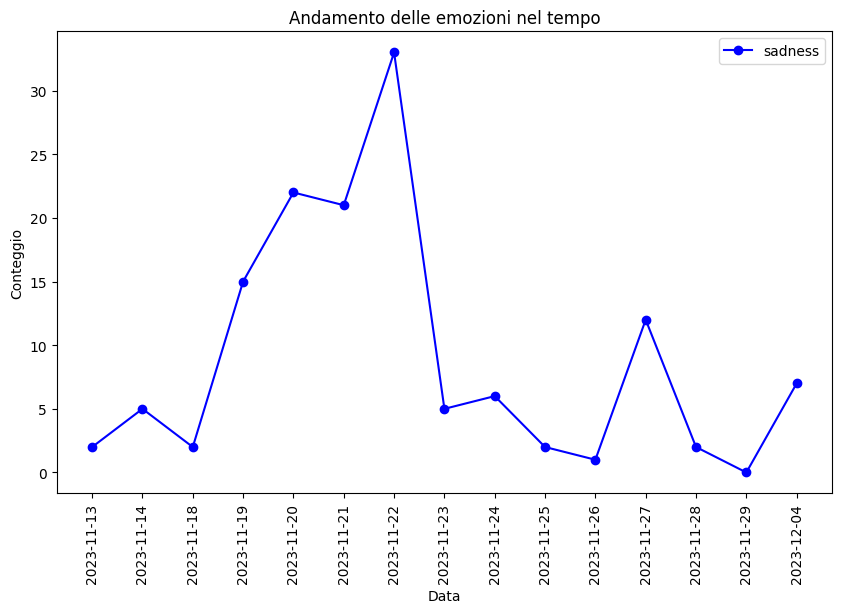

In [90]:
plt.figure(figsize=(10, 6))

plt.plot(unique_dates, counts['sadness'], 'o-', label='sadness', color='blue')

plt.xlabel('Data')
plt.ylabel('Conteggio')
plt.title('Andamento delle emozioni nel tempo')
plt.xticks(rotation=90)
plt.legend()
plt.show()

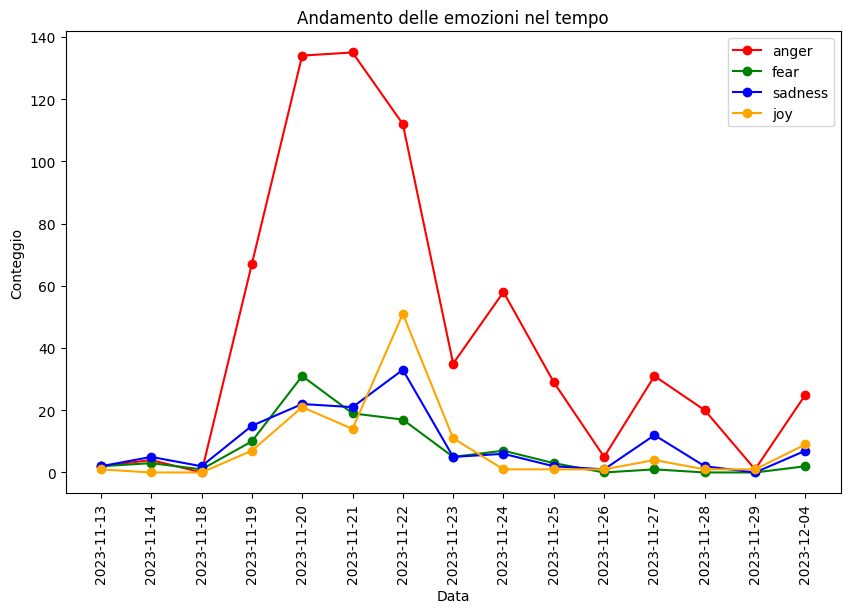

In [91]:
colors = ['red', 'green', 'blue', 'orange']

plt.figure(figsize=(10, 6))

for i, emotion in enumerate(['anger', 'fear', 'sadness', 'joy']):
    plt.plot(unique_dates, counts[emotion], 'o-', label=emotion, color=colors[i])

plt.xlabel('Data')
plt.ylabel('Conteggio')
plt.title('Andamento delle emozioni nel tempo')
plt.xticks(rotation=90)
plt.legend()
plt.show()

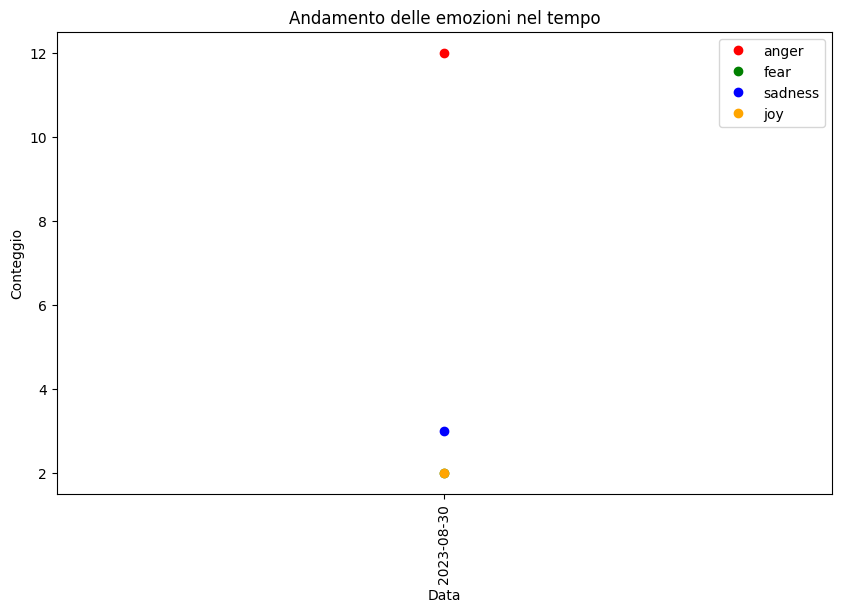

In [92]:
# colors = ['red', 'green', 'blue', 'orange']

plt.figure(figsize=(10, 6))

for i, emotion in enumerate(['anger', 'fear', 'sadness', 'joy']):
        plt.plot(unique_dates2, counts2[emotion], 'o', label=emotion, color=colors[i])

plt.xlabel('Data')
plt.ylabel('Conteggio')
plt.title('Andamento delle emozioni nel tempo')
plt.xticks(rotation=90)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


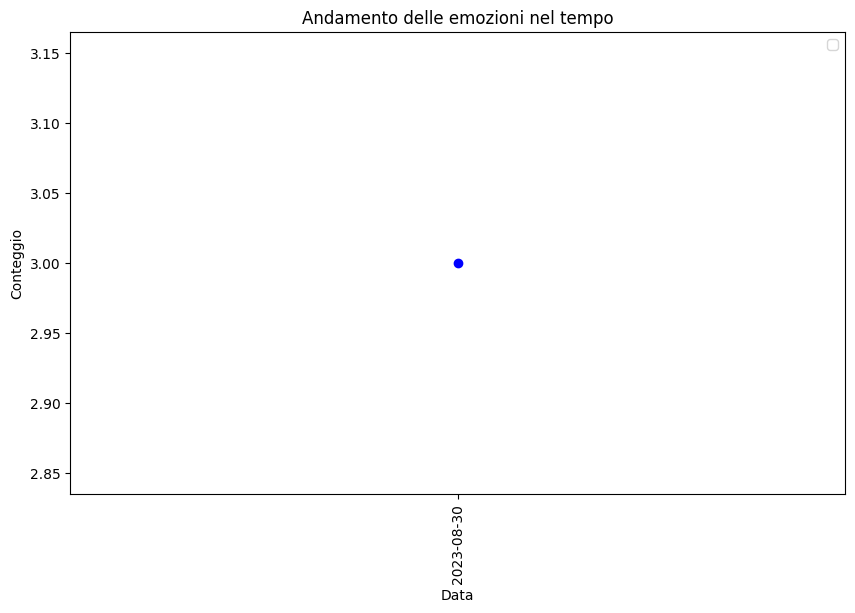

In [93]:
# bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)[source]

plt.figure(figsize=(10, 6))

plt.plot(unique_dates2, counts2['sadness'], "o", color='blue')

plt.xlabel('Data')
plt.ylabel('Conteggio')
plt.title('Andamento delle emozioni nel tempo')
plt.xticks(rotation=90)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


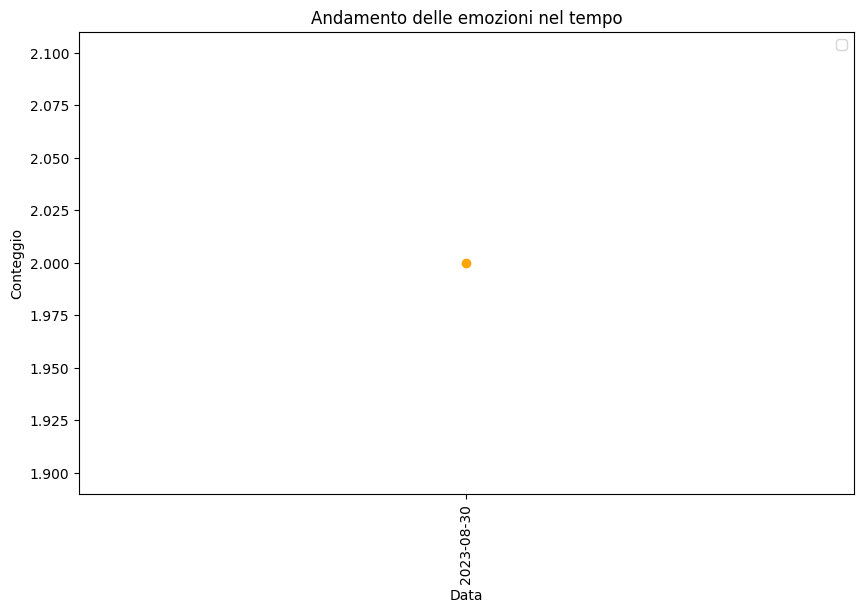

In [94]:
plt.figure(figsize=(10, 6))

plt.plot(unique_dates2, counts2['joy'], "o" ,color='orange')

plt.xlabel('Data')
plt.ylabel('Conteggio')
plt.title('Andamento delle emozioni nel tempo')
plt.xticks(rotation=90)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


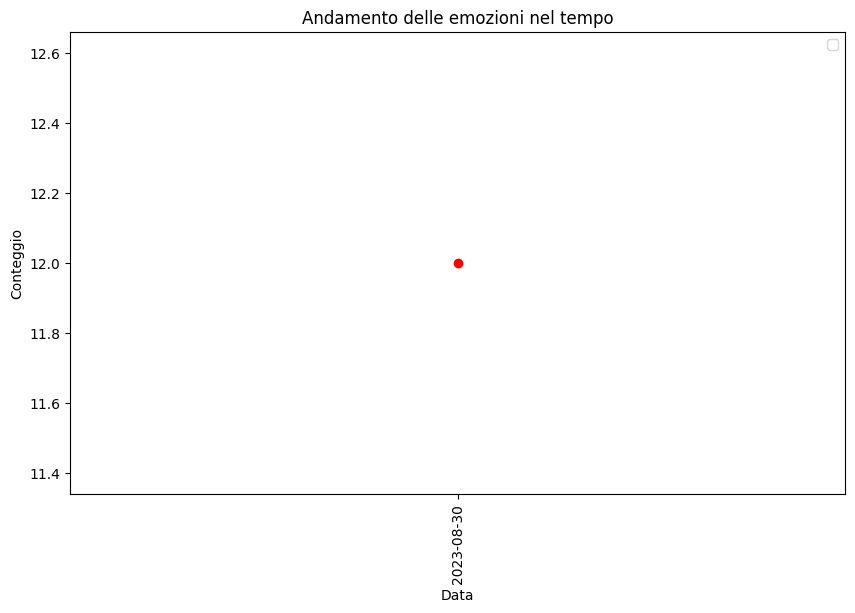

In [95]:
plt.figure(figsize=(10, 6))

plt.plot(unique_dates2, counts2['anger'], "o",color='red')

plt.xlabel('Data')
plt.ylabel('Conteggio')
plt.title('Andamento delle emozioni nel tempo')
plt.xticks(rotation=90)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


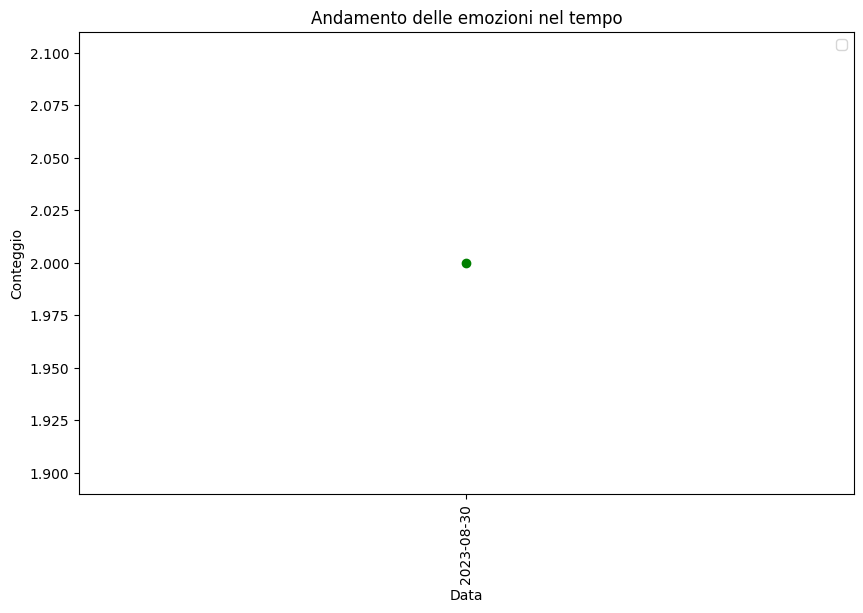

In [96]:
plt.figure(figsize=(10, 6))

plt.plot(unique_dates2, counts2['fear'], "o",color='green')

plt.xlabel('Data')
plt.ylabel('Conteggio')
plt.title('Andamento delle emozioni nel tempo')
plt.xticks(rotation=90)
plt.legend()
plt.show()

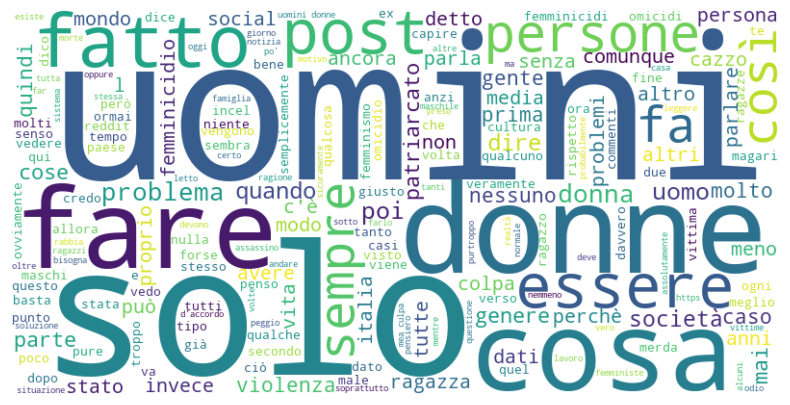

In [97]:
df_filtered = df[df['Emotion'] == 'anger']

text = ' '.join(df_filtered['Comment'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [98]:
df_filtered = df[df['Emotion'] == 'anger']

# Unisci tutti i commenti in una singola stringa
text = ' '.join(df_filtered['Comment'].astype(str))

# Tokenizzazione delle parole e rimozione della punteggiatura
tokens = [word.lower() for word in word_tokenize(text) if word.isalnum()]

# Calcola la frequenza delle parole
freq_dist = FreqDist(tokens)

# Prendi le 10 parole più comuni (puoi cambiare il numero a seconda delle tue esigenze)
top_words = freq_dist.most_common(20)

# Crea una tabella con le parole più utilizzate
word_table = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Visualizza la tabella
print(word_table)

        Word  Frequency
0     uomini        264
1      donne        212
2       solo        182
3       cosa        148
4     essere        148
5       fare        143
6      fatto        128
7       post        124
8    persone        120
9   problema        119
10      uomo        113
11        me        112
12        fa        111
13     parte        109
14     donna        108
15      così        107
16    genere        104
17    sempre        100
18      dire        100
19       poi         91
